In [1]:
# Including necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

%matplotlib inline

C:\Users\skhaldar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Reading the Titanic Dataset
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Dropping some columns deemed not necessary for the job at hand to simplify the computations

titanic1 = titanic.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [8]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [9]:
# Checking for null values
titanic1.Embarked.isnull().sum()

2

In [10]:
# Displaying null values in the "Embarked" column
titanic1[titanic1['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [11]:
# Lets try to find the embark based on survived
titanic1[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [12]:
# Also lets try to find the fare based on Embarked 
titanic1[['Embarked', 'Fare']].groupby('Embarked').mean()

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


In [13]:
# Imputting the missing value
titanic1.loc[titanic1['Embarked'].isnull() == True, 'Embarked']='C'.strip()

In [14]:
# Checking for null values in other columns
titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

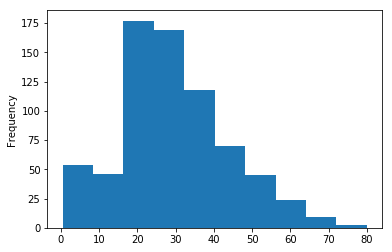

In [15]:
# Plotting distribution based on age
titanic1.Age.plot(kind='hist')
plt.show()

In [16]:
# The Age can be predicted based on Sex, Title and Pclass of existing customer and imputting the median age value.
pd.pivot_table(titanic1, index=['Sex', 'Pclass'], values=['Age'], aggfunc='median')

Age
Sex    Pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [17]:
# Imputation of missing Age values

def fillAges(row):
    if row['Sex']== 'female' and row['Pclass']== 1:
        return 35.0
    elif row['Pclass']== 2:
        return 28
    elif row['Pclass']== 3:
        return 21.5
    elif row['Sex']== 'male' and row['Pclass']== 1:
        return 40
    elif row['Pclass']==2:
        return 30
    elif row['Pclass']==3:
        return 25
titanic1['Age'] = titanic1.apply(lambda s: fillAges(s) if np.isnan(s['Age']) else s['Age'], axis=1)

In [18]:
titanic1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
titanic1.Age.isnull().sum()

0

In [20]:
# Transformation of categorical variables for modeling 

titanic1['Sex'].replace('female', 0, inplace=True)
titanic1['Sex'].replace('male', 1, inplace=True)

In [21]:
# Transformation of categorical variables for modeling 
titanic1['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2],inplace=True)

In [22]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


In [23]:
#features and target
predictors = titanic1[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [24]:
targets = titanic1.Survived

In [25]:
# Splitting into training and testing sets
from sklearn.cross_validation import train_test_split
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [26]:
print(pred_train.shape)
print(pred_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(534, 6)
(357, 6)
(534,)
(357,)


In [27]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

In [28]:
#Build model on training data
classifier=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
classifier=classifier.fit(pred_train,tar_train)

In [29]:
# apply decision tree model to get prediction for test data
predictions=classifier.predict(pred_test)

In [30]:
import sklearn.metrics

In [31]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[197,  25],
       [ 50,  85]], dtype=int64)

In [32]:
# Accuracy
accuracy = sklearn.metrics.accuracy_score(tar_test, predictions)
print ("Test Accuracy: %s" % accuracy)

Test Accuracy: 0.7899159663865546


In [33]:
#%%Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
#from io import StringIO
from sklearn.externals.six import StringIO
#from StringIO import StringIO <- makes error
out_data = StringIO()
tree.export_graphviz(classifier, out_file=out_data)

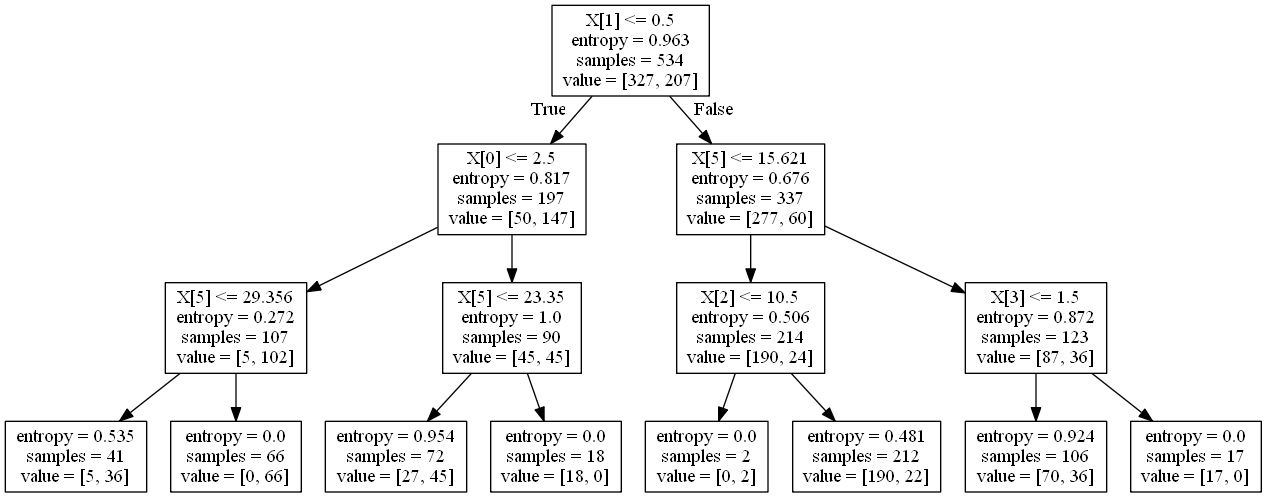

In [34]:
#from IPython.display import Image
import pydotplus
from IPython.display import Image
graph=pydotplus.graph_from_dot_data(out_data.getvalue())
#Image(graph.create_png())
#graph.write_pdf("decision_tree.pdf")
display(Image(graph.create_png()))
